## Work
1. 請比較 SGD optimizer 不同的 momentum 及使用 nesterov 與否的表現

In [1]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若想使用可自行開啟)
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# 資料前處理 - X 標準化
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# 資料前處理 -Y 轉成 onehot
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [8]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [9]:
"""Code Here
設定超參數
"""
LEARNING_RATE = 1e-4
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = [0.85,0.9,0.95]
NESTEROV = ['TRUE','FALSE']

In [10]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for mo in MOMENTUM:
    for nesterov in NESTEROV:
        keras.backend.clear_session() # 把舊的 Graph 清掉
        print("Experiment with MOMENTUM = %f , NESTEROV=%s" % (mo,nesterov))
        model = build_mlp(input_shape=x_train.shape[1:])
        model.summary()
        optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=nesterov, momentum=mo)
        model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

        model.fit(x_train, y_train, 
                  epochs=EPOCHS, 
                  batch_size=BATCH_SIZE, 
                  validation_data=(x_test, y_test), 
                  shuffle=True)

        # Collect results
        train_loss = model.history.history["loss"]
        valid_loss = model.history.history["val_loss"]
        train_acc = model.history.history["acc"]
        valid_acc = model.history.history["val_acc"]

        exp_name_tag = "momentum: %f nesterov: %s" % (mo,nesterov)
        results[exp_name_tag] = {'train-loss': train_loss,
                                 'valid-loss': valid_loss,
                                 'train-acc': train_acc,
                                 'valid-acc': valid_acc}

Experiment with MOMENTUM = 0.850000 , NESTEROV=TRUE
Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Instruct

50000/50000 [==============================] - 8s 152us/step - loss: 1.7532 - acc: 0.3896 - val_loss: 1.7565 - val_acc: 0.3899
Epoch 49/50
50000/50000 [==============================] - 8s 152us/step - loss: 1.7500 - acc: 0.3901 - val_loss: 1.7538 - val_acc: 0.3933
Epoch 50/50
50000/50000 [==============================] - 8s 152us/step - loss: 1.7469 - acc: 0.3917 - val_loss: 1.7507 - val_acc: 0.3937
Experiment with MOMENTUM = 0.850000 , NESTEROV=FALSE
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 

50000/50000 [==============================] - 8s 152us/step - loss: 1.7551 - acc: 0.3876 - val_loss: 1.7598 - val_acc: 0.3866
Epoch 50/50
50000/50000 [==============================] - 8s 152us/step - loss: 1.7521 - acc: 0.3890 - val_loss: 1.7570 - val_acc: 0.3876
Experiment with MOMENTUM = 0.900000 , NESTEROV=TRUE
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)        

50000/50000 [==============================] - 8s 152us/step - loss: 1.6933 - acc: 0.4082 - val_loss: 1.6991 - val_acc: 0.4096
Experiment with MOMENTUM = 0.900000 , NESTEROV=FALSE
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
__________________

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 8s 163us/step - loss: 2.2431 - acc: 0.1819 - val_loss: 2.1716 - val_acc: 0.2198
Epoch 2/50
50000/50000 [==============================] - 8s 152us/step - loss: 2.1218 - acc: 0.2576 - val_loss: 2.0776 - val_acc: 0.2669
Epoch 3/50
50000/50000 [==============================] - 8s 152us/step - loss: 2.0431 - acc: 0.2883 - val_loss: 2.0129 - val_acc: 0.2941
Epoch 4/50
50000/50000 [==============================] - 8s 153us/step - loss: 1.9880 - acc: 0.3097 - val_loss: 1.9649 - val_acc: 0.3172
Epoch 5/50
50000/50000 [==============================] - 8s 153us/step - loss: 1.9459 - acc: 0.3244 - val_loss: 1.9265 - val_acc: 0.3243
Epoch 6/50
50000/50000 [==============================] - 8s 153us/step - loss: 1.9114 - acc: 0.3353 - val_loss: 1.8964 - val_acc: 0.3406
Epoch 7/50
50000/50000 [==============================] - 8s 153us/step - loss: 1.8855 - acc: 0.3449 - val_loss: 1.8730 - 

Epoch 2/50
50000/50000 [==============================] - 8s 152us/step - loss: 2.1330 - acc: 0.2522 - val_loss: 2.0899 - val_acc: 0.2787
Epoch 3/50
50000/50000 [==============================] - 8s 153us/step - loss: 2.0529 - acc: 0.2853 - val_loss: 2.0196 - val_acc: 0.2928
Epoch 4/50
50000/50000 [==============================] - 8s 153us/step - loss: 1.9928 - acc: 0.3057 - val_loss: 1.9687 - val_acc: 0.3148
Epoch 5/50
50000/50000 [==============================] - 8s 153us/step - loss: 1.9477 - acc: 0.3250 - val_loss: 1.9288 - val_acc: 0.3347
Epoch 6/50
50000/50000 [==============================] - 8s 153us/step - loss: 1.9123 - acc: 0.3374 - val_loss: 1.8990 - val_acc: 0.3452
Epoch 7/50
50000/50000 [==============================] - 8s 154us/step - loss: 1.8852 - acc: 0.3447 - val_loss: 1.8747 - val_acc: 0.3480
Epoch 8/50
50000/50000 [==============================] - 8s 153us/step - loss: 1.8633 - acc: 0.3517 - val_loss: 1.8556 - val_acc: 0.3582
Epoch 9/50
50000/50000 [==========

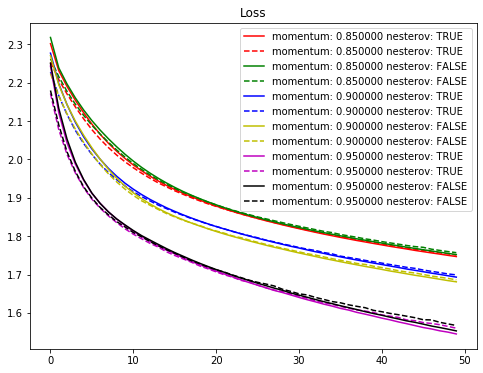

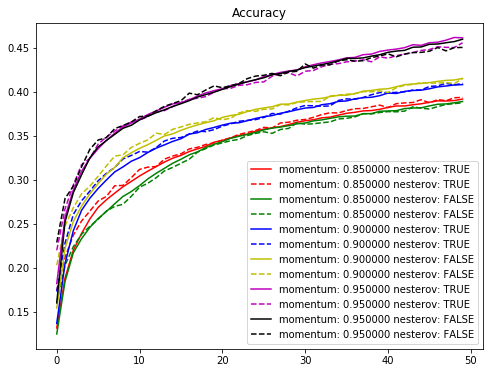

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()